In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

from helpers import *

plt.rcParams.update({
    'font.size': 12,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})


In [4]:
# ids 2-character compounds
ids_path = './data/ids_words/ids_cl_chinese(mandarin).Sheet1.csv'
ids_chi = pd.read_csv(ids_path)
ids_words = ids_chi['Simplified characters'].to_list()
ids_twochar_words = [w for w in ids_words if type(w) == str and len(w) == 2]
print(f'num ids 2-char words = {len(ids_twochar_words)}')

# wordnet 2-character compounds
wn_words = [w for w in wn.all_lemma_names(lang='cmn')]
wn_twochar_words = [w for w in wn_words if len(w) == 2]
print(f'num wordnet 2-char words = {len(wn_twochar_words)}')


num ids 2-char words = 961
num wordnet 2-char words = 14824


In [8]:
# ids statistics
parse_ids = {w: (w[0], w[1]) for i, w in enumerate(ids_twochar_words)}

k = 30
print(f'top {k} ids head words')
head_count_ids = print_top_words(ids_twochar_words, parse_ids, 1, k)
print('')
print(f'top {k} ids modifier words')
modifier_count_ids = print_top_words(ids_twochar_words, parse_ids, 0, k)
print('')


top 30 ids head words
('子', 56) 孩子, 妻子, 儿子, 孙子, 侄子...
('人', 12) 男人, 女人, 老人, 牧人, 商人...
('天', 10) 白天, 今天, 明天, 后天, 昨天...
('头', 8) 木头, 石头, 骨头, 舌头, 乳头...
('开', 8) 烧开, 解开, 切开, 散开, 离开...
('面', 8) 后面, 下面, 前面, 前面, 里面...
('们', 7) 我们, 咱们, 我们, 你们, 他们...
('动', 7) 搅动, 移动, 滚动, 转动, 摇动...
('母', 6) 父母, 祖母, 姨母, 姑母, 岳母...
('父', 6) 祖父, 舅父, 伯父, 叔父, 岳父...
('毛', 6) 体毛, 阴毛, 眉毛, 睫毛, 羽毛...
('皮', 6) 眼皮, 去皮, 削皮, 毛皮, 树皮...
('餐', 6) 一餐, 早餐, 午餐, 晚餐, 正餐...
('女', 5) 少女, 子女, 孙女, 侄女, 继女
('地', 4) 陆地, 土地, 田地, 田地
('击', 4) 雷击, 攻击, 伏击, 射击
('性', 4) 男性, 女性, 雄性, 雌性
('物', 4) 动物, 食物, 谷物, 植物
('羊', 4) 公羊, 母羊, 羔羊, 山羊
('料', 4) 饮料, 布料, 染料, 颜料
('匠', 4) 鞋匠, 石匠, 木匠, 铁匠
('民', 4) 农民, 人民, 公民, 渔民
('麦', 4) 小麦, 大麦, 黑麦, 燕麦
('起', 4) 挂起, 抬起, 溅起, 捡起
('像', 4) 雕像, 相像, 好像, 偶像
('去', 4) 上去, 下去, 出去, 失去
('一', 4) 十一, 唯一, 第一, 周一
('季', 4) 冬季, 春季, 夏季, 秋季
('静', 3) 平静, 安静, 安静
('布', 3) 瀑布, 棉布, 宣布

top 30 ids modifier words
('女', 8) 女人, 女性, 女孩, 女儿, 女婿...
('一', 8) 一餐, 一百, 一千, 一些, 一堆...
('公', 7) 公公, 公牛, 公羊, 公猪, 公马...
('打', 7) 打嗝, 打鼾, 打谷, 打破, 打开...
('周', 7) 周日, 周一, 

In [9]:
# wn statistics
parse_wn = {w: (w[0], w[1]) for i, w in enumerate(wn_twochar_words)}

k = 30
print(f'top {k} wordnet head words')
head_count_wn = print_top_words(wn_twochar_words, parse_wn, 1, k)
print('')
print(f'top {k} wordnet modifier words')
modifier_count_wn = print_top_words(wn_twochar_words, parse_wn, 0, k)
print('')


top 30 wordnet head words
('子', 178) 因子, 痱子, 袋子, 毯子, 梯子...
('属', 100) 魣属, 鳚属, 苹属, 鳀属, 蚕属...
('出', 86) 汇出, 救出, 拔出, 走出, 涌出...
('科', 77) 鹭科, 蚁科, 马科, 魣科, 熊科...
('鱼', 65) 梭鱼, 嘉鱼, 鲂鱼, 鲬鱼, 舵鱼...
('豆', 64) 豇豆, 角豆, 海豆, 巢豆, 藊豆...
('动', 61) 冲动, 举动, 震动, 胎动, 搅动...
('化', 61) 西化, 塑化, 氯化, 磁化, 教化...
('头', 51) 毛头, 听头, 钟头, 点头, 露头...
('人', 49) 诗人, 个人, 主人, 世人, 线人...
('石', 49) 抛石, 基石, 散石, 文石, 矿石...
('角', 45) 切角, 补角, 攻角, 有角, 街角...
('气', 45) 喘气, 怒气, 废气, 叹气, 风气...
('面', 45) 弧面, 露面, 鼓面, 饰面, 锋面...
('车', 45) 机车, 卡车, 铲车, 柩车, 餐车...
('水', 44) 腹水, 下水, 井水, 浸水, 洒水...
('草', 44) 芳草, 扁草, 冰草, 疯草, 烟草...
('点', 44) 地点, 腹点, 弱点, 踩点, 焦点...
('体', 43) 个体, 立体, 身体, 胎体, 解体...
('板', 43) 菜板, 闸板, 地板, 楼板, 插板...
('道', 42) 赤道, 侧道, 频道, 堤道, 波道...
('月', 42) 满月, 牧月, 两月, 足月, 雪月...
('数', 41) 次数, 大数, 模数, 行数, 减数...
('起', 39) 垫起, 竖起, 眠起, 勃起, 隆起...
('酸', 39) 锰酸, 钛酸, 铬酸, 黏酸, 氯酸...
('行', 38) 新行, 进行, 步行, 丑行, 品行...
('入', 38) 吸入, 塞入, 混入, 穿入, 陷入...
('木', 38) 红木, 麻木, 软木, 王木, 旋木...
('带', 37) 臂带, 胸带, 绑带, G带, 胶带...
('线', 36) 支线, 高线, 螺线, 肠线, 曲线...

top 30 word

ids compounds...


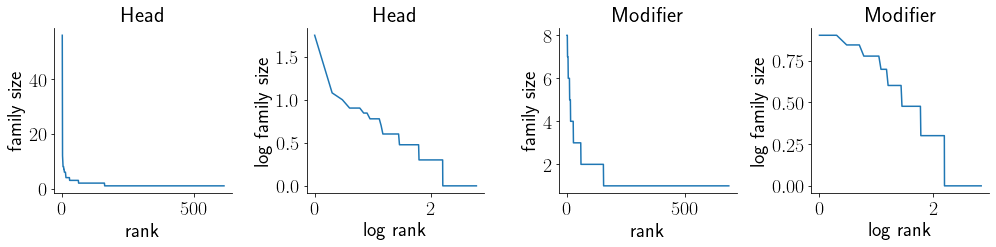

wordnet compounds...


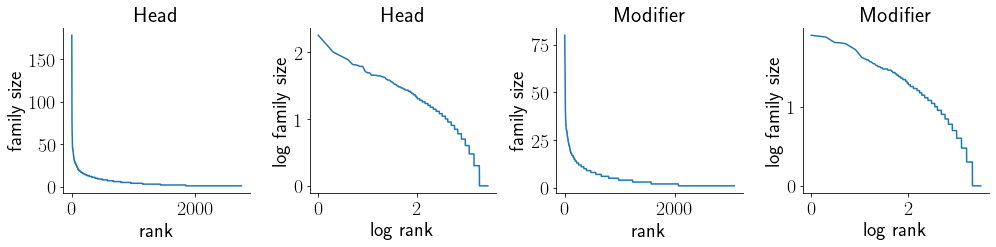

In [7]:
# plot distributions
print('ids compounds...')
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(7*2,3.6))
axes[0:2] = make_rank_plot(axes[0:2], sorted(head_count_ids.keys(), key=lambda w: -head_count_ids[w]), \
                           head_count_ids, 'Head')
axes[2:] = make_rank_plot(axes[2:], sorted(modifier_count_ids.keys(), key=lambda w: -modifier_count_ids[w]), \
                          modifier_count_ids, 'Modifier')
fig.tight_layout()
plt.show()

print('wordnet compounds...')
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(7*2,3.6))
axes[0:2] = make_rank_plot(axes[0:2], sorted(head_count_wn.keys(), key=lambda w: -head_count_wn[w]), \
                           head_count_wn, 'Head')
axes[2:] = make_rank_plot(axes[2:], sorted(modifier_count_wn.keys(), key=lambda w: -modifier_count_wn[w]), \
                          modifier_count_wn, 'Modifier')
fig.tight_layout()
plt.show()
